Model 2:

The analysis in this notebook focuses on both labelled and unlabelled data including current ongoing records of accepted dataset. Labels for unlabelled is predicted using Label propagation methods, Label propagation and Label spreading mainly RBF kernel. This Creates credit scoring model using SVM and random forest, logistic regression classification considering class balancing methods. 

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
from matplotlib import pyplot as plt
from IPython.display import display
from dateutil import parser
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [7]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)

<h3>Loading the dataset </h3>

In [8]:
# Import the dataset
loan_df = pd.read_csv('LC_dataset_accepted_2016_17.csv')

In [9]:
# making a copy to avoid re - reading the whole data set.
df = loan_df.copy(deep=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,83972820,NaN,10000.0,10000.0,10000.0,60 months,13.49,230.05,C,C2,Customer Service,3 years,RENT,32000.0,Not Verified,Jun-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,447xx,OH,13.05,0.0,Apr-1999,750.0,754.0,1.0,NaN,NaN,5.0,0.0,16525.0,47.3,10.0,w,0.00,0.00,10356.270252,10356.27,10000.00,356.27,0.0,0.0,0.0,Oct-2017,454.31,NaN,Oct-2017,769.0,765.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,112399.0,0.0,0.0,0.0,0.0,67.0,0.0,NaN,0.0,0.0,9296.0,47.0,34900.0,1.0,0.0,1.0,0.0,22480.0,18375.0,47.3,0.0,0.0,94.0,206.0,84.0,67.0,1.0,84.0,NaN,6.0,NaN,0.0,2.0,2.0,4.0,7.0,2.0,4.0,7.0,2.0,5.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,141464.0,16525.0,34900.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,84333484,NaN,12000.0,12000.0,12000.0,36 months,15.59,419.46,C,C5,Executive Assistant,7 years,MORTGAGE,70000.0,Verified,Jun-2016,Late (31-120 days),n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,774xx,TX,22.86,0.0,Aug-2000,695.0,699.0,1.0,NaN,NaN,18.0,0.0,20075.0,56.7,45.0,f,2406.15,2406.15,12479.870000,12479.87,9593.85,2886.02,0.0,0.0,0.0,Dec-2018,419.46,Apr-2019,Mar-2019,619.0,615.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,156605.0,2.0,3.0,1.0,1.0,4.0,31445.0,74.0,1.0,5.0,6031.0,66.0,35400.0,0.0,2.0,3.0,6.0,9212.0,140.0,99.1,0.0,0.0,120.0,190.0,2.0,2.0,1.0,13.0,NaN,2.0,NaN,0.0,5.0,8.0,5.0,13.0,12.0,14.0,32.0,8.0,18.0,0.0,0.0,0.0,2.0,100.0,100.0,0.0,0.0,191070.0,5

<h3>Understanding the dataset</h3>

In [10]:
df.shape

(870840, 151)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870840 entries, 0 to 870839
Columns: 151 entries, id to settlement_term
dtypes: float64(113), int64(1), object(37)
memory usage: 1003.2+ MB


<h3> Check Missing Values </h3>

In [12]:
# Checking for missing values
total_miss_data= df.isnull().sum().sort_values(ascending=False)
percent_miss_data= (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([total_miss_data, percent_miss_data],axis=1, keys=["Total", "Percent"])
missing_data

,Total,Percent
member_id,870840,100.000000
desc,870817,99.997359
orig_projected_additional_accrued_interest,865112,99.342244
hardship_dpd,863499,99.157021
hardship_start_date,863499,99.157021
hardship_type,863499,99.157021
hardship_reason,863499,99.157021
hardship_status,863499,99.157021
deferral_term,863499,99.157021
hardship_last_payment_amount,863499,99.157021


About 99% percent of data for the following columns are missing. Cleaning the missing data
1. member_id - A unique LC assigned Id for the borrower member.
2. desc - Loan description provided by the borrower
3. orig_projected_additional_accrued_interest - 
4. hardship_dpd
5. hardship_start_date
6. hardship_type
7. hardship_reason
8. hardship_status
9. deferral_term
10. hardship_last_payment_amount
11. hardship_payoff_balance_amount
12. hardship_loan_status
13. hardship_amount
14. hardship_length
15. payment_plan_start_date
16. hardship_end_date
17. settlement_term
18. settlement_percentage
19. debt_settlement_flag_date
20. settlement_status
21. settlement_date
22. settlement_amount
23. sec_app_mths_since_last_major_derog


In [13]:
# Remove missing value columns for hardship plan introduced in March 2017 for a selective borrowers. About 99.99% data is missing. Removing the columns

df.drop(["member_id", "desc", "orig_projected_additional_accrued_interest","hardship_end_date","deferral_term","payment_plan_start_date"], axis=1, inplace=True)
df.drop(["hardship_length", "hardship_dpd", "hardship_loan_status","hardship_last_payment_amount","hardship_payoff_balance_amount","hardship_amount"], axis=1, inplace=True)
df.drop(["hardship_status", "hardship_reason", "hardship_type","hardship_start_date"], axis=1, inplace=True)

# Removing settlement related attributes that were introduced in Sep 2017 as part of settlement - More than 99% data is missing, removing them

df.drop(["settlement_term", "settlement_percentage", "debt_settlement_flag_date","settlement_status","settlement_date","settlement_amount","sec_app_mths_since_last_major_derog"], axis=1, inplace=True)
df.drop(["sec_app_revol_util", "verification_status_joint", "revol_bal_joint","sec_app_inq_last_6mths","sec_app_fico_range_low","sec_app_fico_range_high","sec_app_earliest_cr_line","sec_app_mort_acc","sec_app_open_acc","sec_app_open_act_il"], axis=1, inplace=True)
df.drop(["sec_app_num_rev_accts", "sec_app_chargeoff_within_12_mths", "sec_app_collections_12_mths_ex_med","annual_inc_joint","dti_joint"], axis=1, inplace=True)


In [14]:
#Checking for missing data post 1st level of cleanup

total_miss_data= df.isnull().sum().sort_values(ascending=False)
percent_miss_data= (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([total_miss_data, percent_miss_data],axis=1, keys=["Total", "Percent"])
missing_data

,Total,Percent
mths_since_last_record,712698,81.840292
mths_since_recent_bc_dlq,658756,75.646043
mths_since_last_major_derog,628531,72.175256
mths_since_recent_revol_delinq,566759,65.081875
next_pymnt_d,458737,52.677530
mths_since_last_delinq,424125,48.702976
il_util,118424,13.598824
mths_since_recent_inq,96529,11.084585
emp_title,60837,6.986014
emp_length,60083,6.899430


In [15]:
# Handling missing values and imputing them with median wherever necessary
# 1. inq_last_6mths - The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
df['inq_last_6mths'].median()
df['inq_last_6mths'].value_counts(dropna=False)

# Impute the missing value NaN with median
df['inq_last_6mths'] =df['inq_last_6mths'].fillna(df['inq_last_6mths'].median())
# Verify the NaN values 
df['inq_last_6mths'].value_counts(dropna=False)

0.0    546411
1.0    223586
2.0     70998
3.0     21818
4.0      5989
5.0      2038
Name: inq_last_6mths, dtype: int64

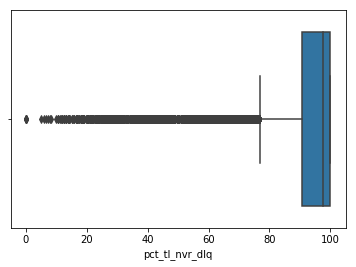

In [16]:
# 2. pct_tl_nvr_dlq - Percent of trades never delinquent
df['pct_tl_nvr_dlq'].value_counts(dropna=False)
sns.boxplot(df['pct_tl_nvr_dlq'])

df['pct_tl_nvr_dlq'].median()
df['pct_tl_nvr_dlq'].mean()
df['pct_tl_nvr_dlq'].mode()

df['pct_tl_nvr_dlq'] =df['pct_tl_nvr_dlq'].fillna(df['pct_tl_nvr_dlq'].median())

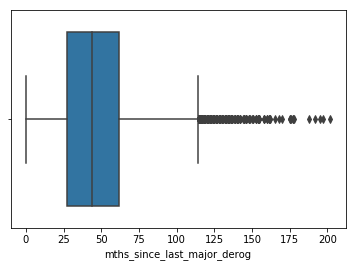

In [17]:
# 3. mths_since_last_major_derog - Months since most recent 90-day or worse rating
df['mths_since_last_major_derog'].value_counts(dropna=False)

#removing the column where more than 70% data is missing
sns.boxplot(df['mths_since_last_major_derog'])

df['mths_since_last_major_derog'].median()
df['mths_since_last_major_derog'].mode()
df['mths_since_last_major_derog'].mean()

df.drop(["mths_since_last_major_derog"], axis=1, inplace=True)

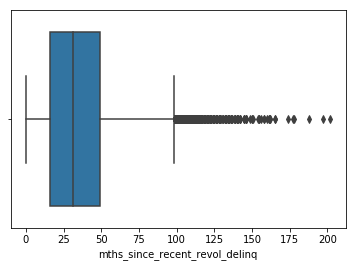

In [18]:
# mths_since_recent_revol_delinq - Months since most recent revolving delinquency.
sns.boxplot(df['mths_since_recent_revol_delinq'])
df['mths_since_recent_revol_delinq'].mean()
df['mths_since_recent_revol_delinq'].median()
df['mths_since_recent_revol_delinq'].mode()

# Imputing the value with 0. Because not all borrowers may not deliquent
df['mths_since_recent_revol_delinq'].fillna(0,inplace=True)

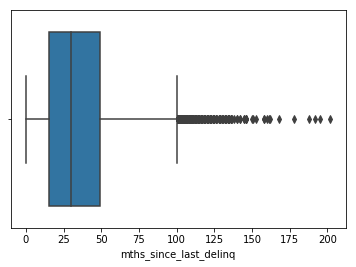

In [19]:
# mths_since_last_delinq - The number of months since the borrower's last delinquency.
df['mths_since_last_delinq'].value_counts(dropna=False)
sns.boxplot(df['mths_since_last_delinq'])
df['mths_since_last_delinq'].median()
df['mths_since_last_delinq'].mode()
df['mths_since_last_delinq'].mean()

# Imputing the value with median 
df['mths_since_last_delinq'] =df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].median())

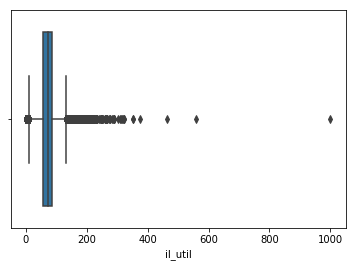

In [20]:
# il_util - Ratio of total current balance to high credit/credit limit on all install acct
df['il_util'].value_counts(dropna=False)
sns.boxplot(df['il_util'])

df['il_util'].mode()
df['il_util'].median()
df['il_util'].mean()

df['il_util'] =df['il_util'].fillna(df['il_util'].median())

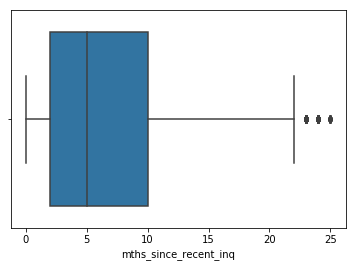

In [21]:
# mths_since_recent_inq - Months since most recent inquiry.
sns.boxplot(df['mths_since_recent_inq'])
df['mths_since_recent_inq'].value_counts(dropna=False)
df['mths_since_recent_inq'].median()

# Imputing the value with median
df['mths_since_recent_inq'] =df['mths_since_recent_inq'].fillna(df['mths_since_recent_inq'].median())

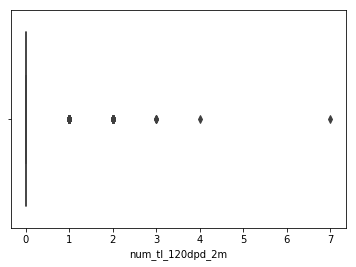

In [22]:
# num_tl_120dpd_2m - Number of accounts currently 120 days past due (updated in past 2 months)
sns.boxplot(df['num_tl_120dpd_2m'])
df['num_tl_120dpd_2m'].value_counts(dropna=False)
df['num_tl_120dpd_2m'] =df['num_tl_120dpd_2m'].fillna(df['num_tl_120dpd_2m'].median())

In [23]:
# Impute values with median - removed 'num_mths_for_next_pymnt'
col=['mths_since_rcnt_il','mo_sin_old_il_acct','bc_util','percent_bc_gt_75','bc_open_to_buy','mths_since_recent_bc','revol_util','all_util','open_acc_6m','total_cu_tl','inq_last_12m','max_bal_bc','open_rv_24m','open_il_12m','open_il_24m','inq_fi','total_bal_il','open_act_il','open_rv_12m','avg_cur_bal']
df[col]=df[col].fillna(df[col].median())
df.isnull().sum()

id                                     0
loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
term                                   0
int_rate                               0
installment                            0
grade                                  0
sub_grade                              0
emp_title                          60837
emp_length                         60083
home_ownership                         0
annual_inc                             0
verification_status                    0
issue_d                                0
loan_status                            0
pymnt_plan                             0
url                                    0
purpose                                0
title                              23088
zip_code                               1
addr_state                             0
dti                                  577
delinq_2yrs                            0
earliest_cr_line

In [24]:
df.dtypes.value_counts().sort_values()

int64       1
object     24
float64    87
dtype: int64

In [25]:
# Gives number of unique values for each category
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                         2
grade                        7
sub_grade                   35
emp_title               199645
emp_length                  11
home_ownership               5
verification_status          3
issue_d                     24
loan_status                  7
pymnt_plan                   2
url                     870840
purpose                     14
title                       14
zip_code                   923
addr_state                  50
earliest_cr_line           707
initial_list_status          2
last_pymnt_d                39
next_pymnt_d                 4
last_credit_pull_d          41
application_type             2
hardship_flag                2
disbursement_method          2
debt_settlement_flag         2
dtype: int64

<h3> Data cleaning </h3>

In [26]:
# Dropping unwanted columns like id, url etc., that doesn't help in the analysis
df.drop(["id","url","zip_code","addr_state"], axis=1, inplace=True)

In [27]:
df.info(max_cols=110)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870840 entries, 0 to 870839
Data columns (total 108 columns):
loan_amnt                         870840 non-null float64
funded_amnt                       870840 non-null float64
funded_amnt_inv                   870840 non-null float64
term                              870840 non-null object
int_rate                          870840 non-null float64
installment                       870840 non-null float64
grade                             870840 non-null object
sub_grade                         870840 non-null object
emp_title                         810003 non-null object
emp_length                        810757 non-null object
home_ownership                    870840 non-null object
annual_inc                        870840 non-null float64
verification_status               870840 non-null object
issue_d                           870840 non-null object
loan_status                       870840 non-null object
pymnt_plan                 

In [28]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,10000.0,10000.0,10000.0,60 months,13.49,230.05,C,C2,Customer Service,3 years,RENT,32000.0,Not Verified,Jun-2016,Fully Paid,n,debt_consolidation,Debt consolidation,13.05,0.0,Apr-1999,750.0,754.0,1.0,30.0,NaN,5.0,0.0,16525.0,47.3,10.0,w,0.00,0.00,10356.270252,10356.27,10000.00,356.27,0.0,0.0,0.0,Oct-2017,454.31,NaN,Oct-2017,769.0,765.0,0.0,1.0,Individual,0.0,0.0,112399.0,0.0,0.0,0.0,0.0,67.0,0.0,73.0,0.0,0.0,9296.0,47.0,34900.0,1.0,0.0,1.0,0.0,22480.0,18375.0,47.3,0.0,0.0,94.0,206.0,84.0,67.0,1.0,84.0,NaN,6.0,0.0,0.0,2.0,2.0,4.0,7.0,2.0,4.0,7.0,2.0,5.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,141464.0,16525.0,34900.0,0.0,N,Cash,N
1,12000.0,12000.0,12000.0,36 months,15.59,419.46,C,C5,Executive Assistant,7 years,MORTGAGE,70000.0,Verified,Jun-2016,Late (31-120 days),n,debt_consolidation,Debt consolidation,22.86,0.0,Aug-2000,695.0,699.0,1.0,30.0,NaN,18.0,0.0,20075.0,56.7,45.0,f,2406.15,2406.15,12479.870000,12479.87,9593.85,2886.02,0.0,0.0,0.0,Dec-2018,419.46,Apr-2019,Mar-2019,619.0,615.0,0.0,1.0,Individual,0.0,0.0,156605.0,2.0,3.0,1.0,1.0,4.0,31445.0,74.0,1.0,5.0,6031.0,66.0,35400.0,0.0,2.0,3.0,6.0,9212.0,140.0,99.1,0.0,0.0,120.0,190.0,2.0,2.0,1.0,13.0,NaN,2.0,0.0,0.0,5.0,8.0,5.0,13.0,12.0,14.0,32.0,8.0,18.0,0.0,0.0,0.0,2.0,100.0,100.0,0.0,0.0,191070.0,51520.0,15200.0,42753.0,N,Cash,N
2,4900.0,4900.0,4900.0,36 months,10.99,160.40,B,B4,Campaign Manager,< 1 year,MORTGAGE,120000.0,Verified,Jun-2016,Current,n,home_improvement,Home improvement,6.07,0.0,Mar-2003,680.0,684.0,0.0,49.0,NaN,5.0,0.0,7244.0,80.5,8.0,f,627.03,627.03,5125.320000,5125.32,4272.97,852.35,0.0,0.0,0.0,Feb-2019,160.40,Apr-2019,Mar-2019,739.0,735.0,0.0,1.0,Individual,0.0,65.0,151803.0,1.0,2.0,0.0,0.0,39.0,20640.0,66.0,1.0,1.0,3689.0,69.0,9000.0,0.0,0.0,0.0,1.0,30361.0,1756.0,80.5,0.0,0.0,159.0,34.0,5.0,5.0,1.0,5.0,NaN,5.0,0.0,1.0,2.0,2.0,2.0,2.0,5.0,2.0,2.0,2.0,5.0,0.0,0.0,0.0,1.0,62.5,50.0,0.0,0.0,183092.0,27884.0,9000.0,31515.0,N,Cash,N
3,21000.0,21000.0,21000.0,60 months,14.49,493.99,C,C4,Administrative Assistant,< 1 year,MORTGAGE,80000.0,Source Verified,Jun-2016,Fully Paid,n,debt_consolidation,Debt consolidation,9.87,0.0,May-1994,735.0,739.0,0.0,30.0,NaN,9.0,0.0,25137.0,79.3,12.0,w,0.00,0.00,23801.115790,23801.12,21000.00,2801.12,0.0,0.0,0.0,Jun-2017,18903.48,NaN,Nov-2017,794.0,790.0,0.0,1.0,Individual,0.0,0.0,475196.0,0.0,0.0,0.0,0.0,13.0,0.0,73.0,0.0,1.0,10081.0,79.0,31700.0,1.0,0.0,0.0,1.0,59400.0,3685.0,86.3,0.0,0

In [29]:
#compare if loan_amnt, funded_amt, funded_amt_inv same or not?
df['loan_funded_match'] = np.where(df['loan_amnt'] == df['funded_amnt'], True, False)

In [30]:
df['loan_funded_match'].value_counts()

True     870837
False         3
Name: loan_funded_match, dtype: int64

In [31]:
df[df.loan_funded_match == False]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan_funded_match
32103,18000.0,10000.0,10000.0,36 months,12.99,336.90,C,C2,Manager,6 years,RENT,60000.0,Source Verified,Jun-2016,Current,n,small_business,Business,20.45,0.0,Nov-2008,685.0,689.0,1.0,30.0,NaN,9.0,0.0,15537.0,43.4,12.0,w,273.39,273.39,11660.48,11660.48,9726.61,1933.87,0.0,0.0,0.0,Mar-2019,336.90,Apr-2019,Mar-2019,694.0,690.0,0.0,1.0,Individual,0.0,155.0,28657.0,1.0,1.0,0.0,0.0,28.0,12376.0,62.0,1.0,1.0,4705.0,51.0,35800.0,0.0,1.0,2.0,1.0,3184.0,19046.0,39.7,0.0,0.0,74.0,90.0,4.0,4.0,0.0,43.0,NaN,4.0,0.0,0.0,4.0,5.0,5.0,6.0,2.0,7.0,9.0,5.0,9.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,56761.0,28657.0,31600.0,20045.0,N,Cash,N,False
32181,20000.0,10000.0,10000.0,36 months,7.39,310.56,A,A4,manager,10+ years,MORTGAGE,55000.0,Verified,Jun-2016,Current,n,debt_consolidation,Debt consolidation,20.77,0.0,Jul-1996,705.0,709.0,0.0,58.0,NaN,10.0,0.0,16751.0,61.4,37.0,w,920.52,920.52,10244.37,10244.37,9079.48,1164.89,0.0,0.0,0.0,Mar-2019,310.56,Apr-2019,Mar-2019,744.0,740.0,0.0,1.0,Joint App,0.0,0.0,53218.0,0.0,1.0,1.0,1.0,12.0,1699.0,52.0,1.0,2.0,7589.0,60.0,27300.0,0.0,1.0,1.0,3.0,6652.0,4263.0,69.5,0.0,0.0,112.0,237.0,10.0,10.0,6.0,10.0,NaN,12.0,0.0,1.0,2.0,3.0,5.0,18.0,2.0,8.0,28.0,3.0,10.0,0.0,0.0,0.0,2.0,97.3,66.7,0.0,0.0,190551.0,18450.0,14000.0,3251.0,N,Cash,N,False
32428,20000.0,10000.0,10000.0,60 months,11.47,219.78,B,B5,Fuel Manager,10+ years,MORTGAGE,50000.0,Verified,Jun-2016,Current,n,debt_consolidation,Debt consolidation,28.13,0.0,Aug-2000,680.0,684.0,0.0,30.0,NaN,6.0,0.0,15590.0,95.0,15.0,w,5208.11,5208.11,7246.37,7246.37,4791.89,2454.48,0.0,0.0,0.0,Mar-2019,219.78,Apr-2019,Mar-2019,684.0,680.0,0.0,1.0,Individual,0.0,0.0,54279.0,0.0,2.0,0.0,1.0,14.0,38689.0,83.0,1.0,1.0,3726.0,95.0,16350.0,0.0,0.0,0.0,2.0,9046.0,3217.0,94.0,0.0,0.0,188.0,127.0,11.0,11.0,0.0,11.0,NaN,14.0,0.0,0.0,3.0,4.0,3.0,3.0,8.0,4.0,7.0,4.0,6.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,62990.0,54279.0,9650.0,46640.0,N,Cash,N,False


In [32]:
df['funded_funded_inv_match'] = np.where(df['funded_amnt'] == df['funded_amnt_inv'], True, False)

df[df.funded_funded_inv_match == False]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan_funded_match,funded_funded_inv_match
17,22000.0,22000.0,21975.0,36 months,6.99,679.20,A,A2,Teacher,10+ years,RENT,73000.00,Source Verified,Jun-2016,Current,n,credit_card,Credit card refinancing,21.24,2.0,Sep-2000,690.0,694.0,0.0,16.0,NaN,24.0,0.0,22101.0,40.9,45.0,f,2013.93,2011.64,22338.090000,22312.71,19986.07,2352.02,0.00,0.00,0.0000,Mar-2019,679.20,Apr-2019,Mar-2019,704.0,700.0,0.0,1.0,Individual,0.0,0.0,59073.0,1.0,6.0,0.0,1.0,15.0,36972.0,93.0,2.0,3.0,5884.0,63.0,54000.0,0.0,0.0,1.0,4.0,2461.0,26130.0,45.3,0.0,0.0,164.0,189.0,4.0,4.0,0.0,4.0,47.0,11.0,16.0,0.0,11.0,14.0,12.0,22.0,14.0,18.0,31.0,15.0,24.0,0.0,0.0,0.0,2.0,91.1,33.3,0.0,0.0,93893.0,59073.0,47800.0,39893.0,N,Cash,N,True,False
65,24000.0,24000.0,23950.0,36 months,10.49,779.95,B,B3,ACCOUNTING MANAGER,1 year,MORTGAGE,120000.00,Source Verified,Jun-2016,Current,n,credit_card,Credit card refinancing,9.39,0.0,Aug-1993,690.0,694.0,1.0,30.0,NaN,19.0,0.0,57133.0,56.3,61.0,f,3052.61,3046.25,24923.430000,24871.51,20947.39,3976.04,0.00,0.00,0.0000,Feb-2019,779.95,Apr-2019,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,333131.0,2.0,1.0,2.0,3.0,4.0,16408.0,97.0,2.0,6.0,20788.0,62.0,101500.0,8.0,1.0,13.0,10.0,18507.0,41867.0,57.7,0.0,0.0,52.0,274.0,4.0,4.0,1.0,4.0,NaN,4.0,0.0,0.0,8.0,8.0,14.0,47.0,5.0,17.0,55.0,8.0,19.0,0.0,0.0,0.0,4.0,100.0,38.5,0.0,0.0,384439.0,73541.0,99000.0,16939.0,N,Cash,N,True,False
85,35000.0,35000.0,34975.0,60 months,24.99,1027.10,E,E4,Finance Manager,8 years,OWN,165000.00,Source Verified,Jun-2016,Current,n,other,Other,30.53,0.0,Oct-1997,740.0,744.0,0.0,33.0,NaN,13.0,0.0,97602.0,31.6,28.0,f,21625.58,21610.13,32745.720000,32722.33,13374.42,19371.30,0.00,0.00,0.0000,Feb-2019,1027.10,Apr-2019,Mar-2019,754.0,750.0,0.0,1.0,Individual,0.0,0.0,819621.0,1.0,3.0,2.0,3.0,3.0,185873.0,73.0,0.0,0.0,7798.0,32.0,134500.0,3.0,0.0,10.0,3.0,68302.0,29088.0,33.6,0.0,0.0,224.0,219.0,35.0,3.0,4.0,35.0,33.0,2.0,33.0,0.0,4.0,6.0,5.0,9.0,7.0,9.0,17.0,6.0,13.0,0.0,0.0,0.0,2.0,100.0,20.0,0.0,0.0,927022.0,283475.0,47000.0,212522.0,N,Cash,N,True,False
107,11000.0,11000.0,10975.0,36 months,12.79,369.53,C,C1,Deputy Clerk III,10+ years,RENT,42000.00,Not Verified,Jun-2016,Fully Paid,n,debt_consolidation,Debt consolidation,14.71,1.0,May-1993,660.0,664.0,0.0,14.0,NaN,4.0,0.0,9481.0,93.0,29.0,f,0.00,0.00,12688.170855,12659.33,11000.00,1688.17,0.00,0.00,0.0000,Jan-2018,6413.98,NaN,Jul-2018,689.0,685.0,0.0,1.0,Individual,0.0,

In [33]:
df['funded_funded_inv_match'].value_counts()

True     836391
False     34449
Name: funded_funded_inv_match, dtype: int64

Loan amnt = The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
funded amnt = The total amount committed to that loan at that point in time.
funded amnt inv = The total amount committed by investors for that loan at that point in time.

Since the primary focus was on loan amount disbursed than the amount applied for, we will remove loan_amnt column from the dataset

In [34]:
df.drop(["loan_amnt"], axis=1, inplace=True)

In [35]:
df.drop(["funded_amnt_inv"], axis=1, inplace=True)

In [36]:
df["disbursement_method"].value_counts()

Cash         864109
DirectPay      6731
Name: disbursement_method, dtype: int64

In [37]:
df["disbursement_method"].isnull().sum()

0

In [38]:
#Removing disbursement method column as the loan is granted to the borrower in either ways. The column isn't significant for our analysis
df.drop(["disbursement_method"], axis=1, inplace=True)

In [39]:
#debt_settlement_flag
df["debt_settlement_flag"].value_counts()

N    855161
Y     15679
Name: debt_settlement_flag, dtype: int64

In [40]:
# hardship flag
df["hardship_flag"].value_counts()

N    870263
Y       577
Name: hardship_flag, dtype: int64

In [41]:
# For the purpose of initial analysis we are removing hardship plan attributes for our analysis.
df.drop(["hardship_flag"], axis=1, inplace=True)

In [42]:
#term
df["term"].value_counts()

 36 months    639010
 60 months    231830
Name: term, dtype: int64

In [43]:
df["purpose"].unique()

array(['debt_consolidation', 'home_improvement', 'major_purchase',
       'credit_card', 'other', 'medical', 'vacation', 'renewable_energy',
       'car', 'moving', 'small_business', 'house', 'wedding',
       'educational'], dtype=object)

In [44]:
df["title"].unique()

array(['Debt consolidation', 'Home improvement', 'Major purchase',
       'Credit card refinancing', 'Other', 'Medical expenses', 'Vacation',
       nan, 'Green loan', 'Car financing', 'Moving and relocation',
       'Business', 'Home buying', 'Credit Card Consolidation',
       'Learning and training'], dtype=object)

Analysing the column values of title and purpose, both takes similar values and one is mapped to the other. So, to reduce duplication, removinh title column

In [45]:
df.drop(["title"], axis=1, inplace=True)

In [46]:
df["loan_status"].unique()

array(['Fully Paid', 'Late (31-120 days)', 'Current', 'Charged Off',
       'Late (16-30 days)', 'In Grace Period', 'Default'], dtype=object)

In [47]:
df["loan_status"].value_counts()

Current               392536
Fully Paid            351901
Charged Off           106836
Late (31-120 days)     12483
In Grace Period         4670
Late (16-30 days)       2384
Default                   30
Name: loan_status, dtype: int64

In [48]:
df.info(max_cols=110)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870840 entries, 0 to 870839
Data columns (total 105 columns):
funded_amnt                       870840 non-null float64
term                              870840 non-null object
int_rate                          870840 non-null float64
installment                       870840 non-null float64
grade                             870840 non-null object
sub_grade                         870840 non-null object
emp_title                         810003 non-null object
emp_length                        810757 non-null object
home_ownership                    870840 non-null object
annual_inc                        870840 non-null float64
verification_status               870840 non-null object
issue_d                           870840 non-null object
loan_status                       870840 non-null object
pymnt_plan                        870840 non-null object
purpose                           870840 non-null object
dti                          

In [49]:
# Removing unwanted columns
df.drop(["loan_funded_match","funded_funded_inv_match"], axis=1, inplace=True)

In [50]:
df.info(max_cols=110)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870840 entries, 0 to 870839
Data columns (total 103 columns):
funded_amnt                       870840 non-null float64
term                              870840 non-null object
int_rate                          870840 non-null float64
installment                       870840 non-null float64
grade                             870840 non-null object
sub_grade                         870840 non-null object
emp_title                         810003 non-null object
emp_length                        810757 non-null object
home_ownership                    870840 non-null object
annual_inc                        870840 non-null float64
verification_status               870840 non-null object
issue_d                           870840 non-null object
loan_status                       870840 non-null object
pymnt_plan                        870840 non-null object
purpose                           870840 non-null object
dti                          

In [51]:
df.drop(["debt_settlement_flag"], axis=1, inplace=True)

In [52]:
# publicly available policy_code=1
# new products not publicly available policy_code=2
# Since all the products are publicly available, the code is 1. There is no useful information from this attribute. Removing the column

df["policy_code"].value_counts()

1.0    870840
Name: policy_code, dtype: int64

In [53]:
df.drop(["policy_code"], axis=1, inplace=True)

In [54]:
df["application_type"].value_counts()

Individual    819833
Joint App      51007
Name: application_type, dtype: int64

In [55]:
df["pymnt_plan"].value_counts()

n    870418
y       422
Name: pymnt_plan, dtype: int64

In [56]:
# delinq_2yrs - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
df["delinq_2yrs"].value_counts()

0.0     693836
1.0     116062
2.0      34637
3.0      12990
4.0       5814
5.0       2946
6.0       1715
7.0        998
8.0        588
9.0        397
10.0       262
11.0       186
12.0       129
13.0        80
14.0        57
15.0        45
16.0        28
18.0        15
20.0        13
17.0        12
19.0        11
21.0         7
22.0         2
25.0         2
30.0         1
32.0         1
42.0         1
26.0         1
28.0         1
36.0         1
29.0         1
24.0         1
Name: delinq_2yrs, dtype: int64

In [57]:
# earliest_cr_line - The month the borrower's earliest reported credit line was opened
df["earliest_cr_line"].value_counts()

Sep-2005    6651
Sep-2004    6587
Aug-2004    6367
Sep-2003    6328
Aug-2005    6318
Aug-2003    6258
Aug-2006    6064
Oct-2003    5911
Oct-2004    5870
Aug-2002    5677
Jul-2003    5554
Sep-2002    5500
Jul-2004    5460
Nov-2004    5448
Oct-2005    5333
Jun-2005    5288
Aug-2001    5266
Oct-2002    5259
Mar-2004    5189
Mar-2005    5028
Jul-2005    5024
Nov-2005    5018
Oct-2001    4977
Sep-2006    4958
Dec-2004    4887
May-2005    4878
May-2004    4875
Nov-2003    4837
Jun-2004    4814
Aug-2000    4775
Mar-2006    4772
Nov-2002    4669
Feb-2005    4657
Jun-2003    4630
Jun-2006    4620
Aug-2007    4619
May-2003    4600
Dec-2003    4600
Apr-2004    4582
Jul-2002    4579
Apr-2005    4577
Nov-2001    4544
May-2006    4524
Jan-2005    4498
Jul-2006    4473
Oct-2000    4473
Feb-2004    4450
Mar-2003    4441
Dec-2005    4419
Sep-2001    4395
Nov-1999    4337
Sep-2000    4329
Apr-2003    4327
Nov-2000    4318
Oct-2006    4298
Apr-2006    4278
Feb-2006    4257
Apr-2002    4191
Jan-2006    41

In [58]:
df["initial_list_status"].value_counts()

w    672010
f    198830
Name: initial_list_status, dtype: int64

In [59]:
#collections_12_mths_ex_med
df["collections_12_mths_ex_med"].value_counts()

0.0     853215
1.0      16308
2.0       1083
3.0        136
4.0         52
5.0         21
6.0         10
7.0          6
9.0          3
12.0         2
20.0         1
11.0         1
8.0          1
10.0         1
Name: collections_12_mths_ex_med, dtype: int64

In [60]:
df.head()

,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,10000.0,60 months,13.49,230.05,C,C2,Customer Service,3 years,RENT,32000.0,Not Verified,Jun-2016,Fully Paid,n,debt_consolidation,13.05,0.0,Apr-1999,750.0,754.0,1.0,30.0,NaN,5.0,0.0,16525.0,47.3,10.0,w,0.00,0.00,10356.270252,10356.27,10000.00,356.27,0.0,0.0,0.0,Oct-2017,454.31,NaN,Oct-2017,769.0,765.0,0.0,Individual,0.0,0.0,112399.0,0.0,0.0,0.0,0.0,67.0,0.0,73.0,0.0,0.0,9296.0,47.0,34900.0,1.0,0.0,1.0,0.0,22480.0,18375.0,47.3,0.0,0.0,94.0,206.0,84.0,67.0,1.0,84.0,NaN,6.0,0.0,0.0,2.0,2.0,4.0,7.0,2.0,4.0,7.0,2.0,5.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,141464.0,16525.0,34900.0,0.0
1,12000.0,36 months,15.59,419.46,C,C5,Executive Assistant,7 years,MORTGAGE,70000.0,Verified,Jun-2016,Late (31-120 days),n,debt_consolidation,22.86,0.0,Aug-2000,695.0,699.0,1.0,30.0,NaN,18.0,0.0,20075.0,56.7,45.0,f,2406.15,2406.15,12479.870000,12479.87,9593.85,2886.02,0.0,0.0,0.0,Dec-2018,419.46,Apr-2019,Mar-2019,619.0,615.0,0.0,Individual,0.0,0.0,156605.0,2.0,3.0,1.0,1.0,4.0,31445.0,74.0,1.0,5.0,6031.0,66.0,35400.0,0.0,2.0,3.0,6.0,9212.0,140.0,99.1,0.0,0.0,120.0,190.0,2.0,2.0,1.0,13.0,NaN,2.0,0.0,0.0,5.0,8.0,5.0,13.0,12.0,14.0,32.0,8.0,18.0,0.0,0.0,0.0,2.0,100.0,100.0,0.0,0.0,191070.0,51520.0,15200.0,42753.0
2,4900.0,36 months,10.99,160.40,B,B4,Campaign Manager,< 1 year,MORTGAGE,120000.0,Verified,Jun-2016,Current,n,home_improvement,6.07,0.0,Mar-2003,680.0,684.0,0.0,49.0,NaN,5.0,0.0,7244.0,80.5,8.0,f,627.03,627.03,5125.320000,5125.32,4272.97,852.35,0.0,0.0,0.0,Feb-2019,160.40,Apr-2019,Mar-2019,739.0,735.0,0.0,Individual,0.0,65.0,151803.0,1.0,2.0,0.0,0.0,39.0,20640.0,66.0,1.0,1.0,3689.0,69.0,9000.0,0.0,0.0,0.0,1.0,30361.0,1756.0,80.5,0.0,0.0,159.0,34.0,5.0,5.0,1.0,5.0,NaN,5.0,0.0,1.0,2.0,2.0,2.0,2.0,5.0,2.0,2.0,2.0,5.0,0.0,0.0,0.0,1.0,62.5,50.0,0.0,0.0,183092.0,27884.0,9000.0,31515.0
3,21000.0,60 months,14.49,493.99,C,C4,Administrative Assistant,< 1 year,MORTGAGE,80000.0,Source Verified,Jun-2016,Fully Paid,n,debt_consolidation,9.87,0.0,May-1994,735.0,739.0,0.0,30.0,NaN,9.0,0.0,25137.0,79.3,12.0,w,0.00,0.00,23801.115790,23801.12,21000.00,2801.12,0.0,0.0,0.0,Jun-2017,18903.48,NaN,Nov-2017,794.0,790.0,0.0,Individual,0.0,0.0,475196.0,0.0,0.0,0.0,0.0,13.0,0.0,73.0,0.0,1.0,10081.0,79.0,31700.0,1.0,0.0,0.0,1.0,59400.0,3685.0,86.3,0.0,0.0,130.0,265.0,14.0,14.0,2.0,14.0,NaN,16.0,0.0,0.0,4.0,6.0,5.0,7.0,0.0,7.0,10.0,6.0,9.0,0.0,0.0,0.0,0.0,100.0,75.0,0.0,0.0,507700.0,25137.0,26900.0,0.0
4,5000.0,36 months,10.99,163.67,B,B4,VP of Sales,5 years,MORTGAGE,120000.0,Source Verified,Jun-2016,Current,n,major_purchase,2

In [61]:
# verification status field indicates whether the income of the borrower is verified at LC or not. This information is
# not significant after granting the loan. Removing this colum from the data set

df.drop(["verification_status"], axis=1, inplace=True)

Columns for clean up 
1. term - 36 or 60 - to clean categorical values
2. emp length - values between 0 and 10, 0 is emp < 1 year and 10 is >= 10 years
3. home_ownership - values - RENT, OWN, MORTGAGE, OTHER
4. issue_d - month in which the loan is funded
5. loan_status - current status of the loan
6. pymnt_plan - Indicates if a payment plan has been put in place for the loan - can be removed as it is not significant
n    1361785
y        573
Name: pymnt_plan, dtype: int64
7. 



Values:
verification_status- Indicates if income was verified by LC, not verified, or if the income source was verified!


In [62]:
# data cleanup for term 
# two valid values - 36 , 60 months, converting to numbers

df['term'] = df['term'].apply(lambda x: x.split()[0])

In [63]:
df['term'].value_counts()

36    639010
60    231830
Name: term, dtype: int64

In [64]:
# Data cleanup for emp length
# emp length - values between 0 and 10, 0 is emp < 1 year and 10 is >= 10 years
df["emp_length"].isnull().sum()

60083

In [65]:
# about 1 lakh null records missing. 
df['emp_length'].value_counts(dropna=False).sort_index()

1 year        57655
10+ years    293540
2 years       79380
3 years       69474
4 years       52334
5 years       52673
6 years       37353
7 years       29848
8 years       31621
9 years       31802
< 1 year      75077
NaN           60083
Name: emp_length, dtype: int64

In [66]:
# converting the column into integer
df['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)
df['emp_length'].replace(to_replace='< 1 year', value='0 year', inplace=True)
df['emp_length'].value_counts()

10 years    293540
2 years      79380
0 year       75077
3 years      69474
1 year       57655
5 years      52673
4 years      52334
6 years      37353
9 years      31802
8 years      31621
7 years      29848
Name: emp_length, dtype: int64

In [67]:
# Using the above logic to convert emp_length to integer and leaving null values behind
def convert_to_int(x):
    if pd.isnull(x):
        return x
    else:
        return np.int8(x.split()[0])

In [68]:
df["emp_length"] = df["emp_length"].apply(convert_to_int)

In [69]:
df["emp_length"].value_counts(dropna=False)

 10.0    293540
 2.0      79380
 0.0      75077
 3.0      69474
NaN       60083
 1.0      57655
 5.0      52673
 4.0      52334
 6.0      37353
 9.0      31802
 8.0      31621
 7.0      29848
Name: emp_length, dtype: int64

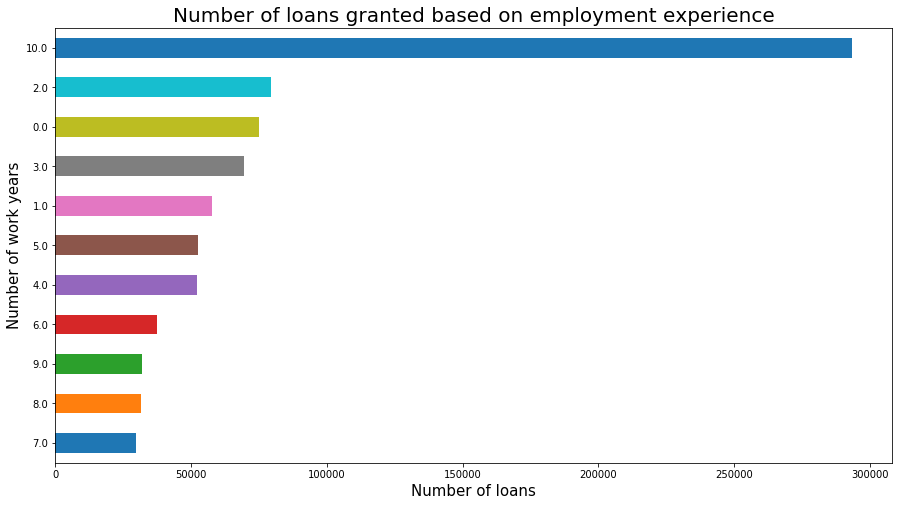

In [70]:
df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(15,8))
plt.title('Number of loans granted based on employment experience',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Number of work years',fontsize=15);

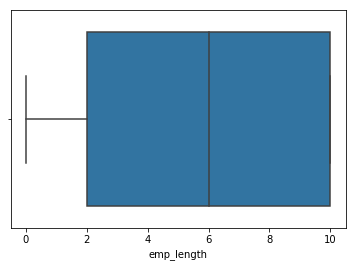

In [71]:
# emp_length - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
sns.boxplot(df['emp_length'])
df['emp_length'].value_counts(dropna=False)
df['emp_length'].mean()
df['emp_length'].median()
df['emp_length'] =df['emp_length'].fillna(df['emp_length'].median())

In [72]:
#home_ownership - correcting the values to valid ones
df['home_ownership'].value_counts(dropna=False)

MORTGAGE    424568
RENT        340989
OWN         104779
ANY            500
NONE             4
Name: home_ownership, dtype: int64

In [73]:
df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

In [74]:
df['home_ownership'].value_counts(dropna=False)

MORTGAGE    424568
RENT        340989
OWN         104779
OTHER          504
Name: home_ownership, dtype: int64

In [75]:
df.info(max_cols=100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870840 entries, 0 to 870839
Data columns (total 100 columns):
funded_amnt                       870840 non-null float64
term                              870840 non-null object
int_rate                          870840 non-null float64
installment                       870840 non-null float64
grade                             870840 non-null object
sub_grade                         870840 non-null object
emp_title                         810003 non-null object
emp_length                        870840 non-null float64
home_ownership                    870840 non-null object
annual_inc                        870840 non-null float64
issue_d                           870840 non-null object
loan_status                       870840 non-null object
pymnt_plan                        870840 non-null object
purpose                           870840 non-null object
dti                               870263 non-null float64
delinq_2yrs                

In [76]:
df['initial_list_status'].value_counts(dropna=False)

w    672010
f    198830
Name: initial_list_status, dtype: int64

In [77]:
# correlation and heat map
#plt.figure(figsize=(30,20))
#sns.heatmap(df.corr(), cmap="YlGnBu")
#plt.show()

In [78]:
df['application_type'].value_counts(dropna=False)

Individual    819833
Joint App      51007
Name: application_type, dtype: int64

In [79]:
# removing those rows which are joint applications as we have removed related attributes for joint applications. 
# Focusing on individual applications in this analysis

ndf=df[df['application_type']=='Individual']
ndf['application_type'].value_counts(dropna=False)

Individual    819833
Name: application_type, dtype: int64

In [80]:
ndf.shape

(819833, 100)

In [81]:
# removing the application type column
ndf.drop(["application_type"], axis=1, inplace=True)

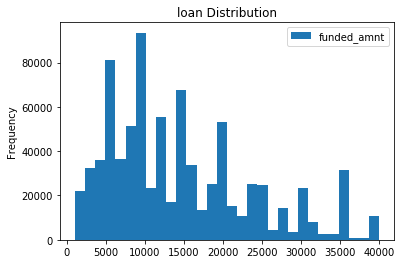

In [82]:
ndf[['funded_amnt']].plot.hist(bins =30, title = 'loan Distribution')

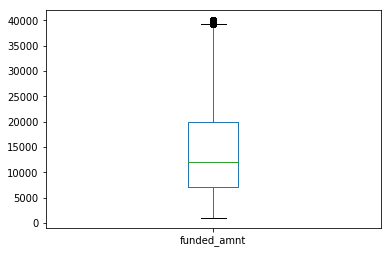

In [83]:
ndf[['funded_amnt']].plot.box()

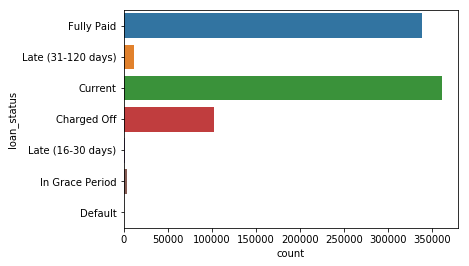

In [84]:
 sns.countplot(y="loan_status", data=ndf)

In [85]:
ndf['loan_status'].value_counts(dropna=False)

Current               361587
Fully Paid            338475
Charged Off           102001
Late (31-120 days)     11450
In Grace Period         4154
Late (16-30 days)       2140
Default                   26
Name: loan_status, dtype: int64

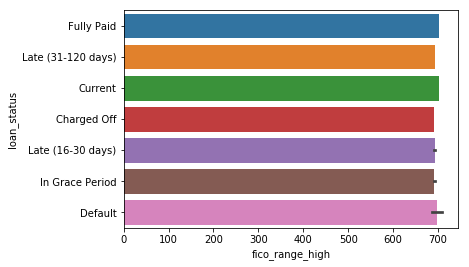

In [86]:
sns.barplot(y="loan_status",x="fico_range_high",data=ndf)

In [87]:
#plt.figure(figsize=(25, 15))
#plt.subplot(2,3,1)
#sns.barplot(y="loan_status",x="emp_length",data=ndf)
#plt.subplot(2,3,2)
#sns.barplot(y="loan_status",x="term",data=ndf)
#plt.subplot(2,3,3)
#sns.barplot(y="loan_status",x="int_rate",data=ndf)
#plt.subplot(2,3,4)
#sns.barplot(y="loan_status",x="fico_range_high",data=ndf)
#plt.subplot(2,3,5)
#sns.barplot(y="loan_status",x="dti",data=ndf)
#plt.subplot(2,3,6)
#sns.barplot(y="loan_status",x="fico_range_low",data=ndf)


In [88]:
ndf.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                        2
grade                       7
sub_grade                  35
emp_title              191219
home_ownership              4
issue_d                    24
loan_status                 7
pymnt_plan                  2
purpose                    14
earliest_cr_line          702
initial_list_status         2
last_pymnt_d               39
next_pymnt_d                4
last_credit_pull_d         41
dtype: int64

In [89]:
ndf['emp_title'].value_counts(dropna=False)
# almost emp_title              253709 - 2 Lakh unique values of emp_title values. We cannot encode such a long list of titles
# also, there is no much significant information with the column. Removing the column

ndf.drop(['emp_title'], axis=1, inplace=True)

In [90]:
ndf["loan_status"].value_counts(dropna=False)

Current               361587
Fully Paid            338475
Charged Off           102001
Late (31-120 days)     11450
In Grace Period         4154
Late (16-30 days)       2140
Default                   26
Name: loan_status, dtype: int64

In [91]:
def is_default(x):
    if x=='Default' or x=='Late (31-120 days)' or x=='Charged Off':
        return 1
    elif x=='Fully Paid':
        return 0
    elif x=='Current' or x=='Late (16-30 days)' or x=='In Grace Period':
        return -1

In [92]:
ndf["is_default"] = ndf["loan_status"].apply(is_default)

In [93]:
ndf["is_default"].value_counts(dropna=False)

-1    367881
 0    338475
 1    113477
Name: is_default, dtype: int64

In [94]:
ndf.shape

(819833, 99)

In [95]:
ndf.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                     2
grade                    7
sub_grade               35
home_ownership           4
issue_d                 24
loan_status              7
pymnt_plan               2
purpose                 14
earliest_cr_line       702
initial_list_status      2
last_pymnt_d            39
next_pymnt_d             4
last_credit_pull_d      41
dtype: int64

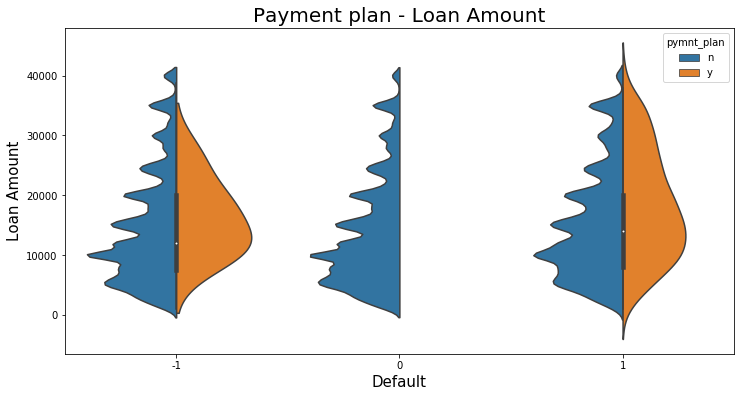

In [96]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="is_default",y="funded_amnt",data=ndf, hue="pymnt_plan", split=True)
plt.title("Payment plan - Loan Amount", fontsize=20)
plt.xlabel("Default", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

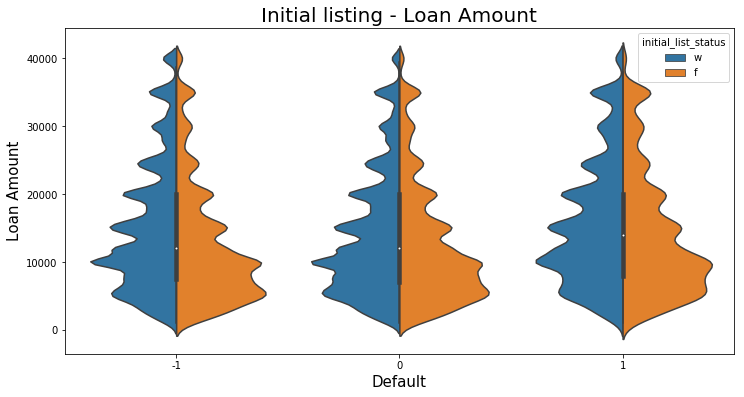

In [97]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="is_default",y="funded_amnt",data=ndf, hue="initial_list_status", split=True)
plt.title("Initial listing - Loan Amount", fontsize=20)
plt.xlabel("Default", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

In [98]:
corr = ndf.corr()['is_default'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', corr.tail(10))
print('\nMost Negative Correlations:\n', corr.head(10))

Most Positive Correlations:
 open_il_24m                0.105550
open_il_12m                0.107992
inq_last_12m               0.109646
num_tl_op_past_12m         0.126814
acc_open_past_24mths       0.138520
int_rate                   0.154711
last_pymnt_amnt            0.223212
collection_recovery_fee    0.362525
recoveries                 0.367990
is_default                 1.000000
Name: is_default, dtype: float64

Most Negative Correlations:
 out_prncp               -0.520460
out_prncp_inv           -0.520416
last_fico_range_high    -0.448687
last_fico_range_low     -0.423250
total_rec_int           -0.158640
mo_sin_rcnt_tl          -0.085391
fico_range_low          -0.079413
fico_range_high         -0.079412
mo_sin_rcnt_rev_tl_op   -0.074998
mths_since_recent_inq   -0.066520
Name: is_default, dtype: float64


<h3> Handling Datetime attributes </h3>

In [99]:
ndf['next_pymnt_d'].value_counts(dropna=False)

NaN         440476
Apr-2019    379169
Mar-2019       158
May-2019        29
Feb-2019         1
Name: next_pymnt_d, dtype: int64

In [100]:
ndf['next_pymnt_d'] = pd.to_datetime(ndf['next_pymnt_d'],format='%b-%Y')
ndf['last_pymnt_d'] = pd.to_datetime(ndf['last_pymnt_d'],format='%b-%Y')

In [101]:
# dervied variable - num_mths_for_next_pymnt
def num_mths_for_next_pymnt(x):
    if x["loan_status"]=='Fully Paid' or x["loan_status"]=='Charged Off':
        return 0
    else:
        return (x["next_pymnt_d"].year - x["last_pymnt_d"].year) * 12 + x["next_pymnt_d"].month - x["last_pymnt_d"].month

In [102]:
ndf['num_mths_for_next_pymnt']=ndf.apply(num_mths_for_next_pymnt, axis=1)


In [103]:
ndf['num_mths_for_next_pymnt'].value_counts(dropna=False)

0    440502
1    343995
2     26835
3      3658
4      2712
5      2118
6        12
9         1
Name: num_mths_for_next_pymnt, dtype: int64

In [104]:
ndf['num_mths_for_next_pymnt'] =ndf['num_mths_for_next_pymnt'].fillna(0)

In [105]:
# convert earliest_cr_line date form to months since credit line opened while comparing with issue_date

# dervied variable - num_mths_for_next_pymnt
def num_mths_since_cr_line_open(x):
        return (x["issue_d"].year - x["earliest_cr_line"].year) * 12 + x["issue_d"].month - x["earliest_cr_line"].month


In [106]:
ndf['issue_d'] = pd.to_datetime(ndf['issue_d'],format='%b-%Y')
ndf['earliest_cr_line'] = pd.to_datetime(ndf['earliest_cr_line'],format='%b-%Y')
ndf['num_mths_since_cr_line_open']=ndf.apply(num_mths_since_cr_line_open, axis=1)

In [107]:
ndf['num_mths_since_cr_line_open'].value_counts(dropna=False)

151    5136
143    5109
152    5063
146    5060
145    5057
142    5049
155    5044
139    5028
144    5025
154    5020
141    4985
156    4983
140    4951
150    4942
153    4927
137    4924
135    4921
149    4912
148    4873
147    4862
138    4862
136    4844
157    4834
162    4777
134    4756
130    4747
132    4744
133    4701
163    4679
160    4668
159    4658
164    4640
131    4635
158    4633
161    4630
166    4609
165    4594
129    4558
127    4501
128    4500
167    4494
168    4462
169    4436
171    4408
126    4366
172    4363
170    4331
176    4319
125    4299
174    4289
173    4285
178    4232
175    4201
124    4194
177    4172
179    4135
123    4111
180    4069
181    3963
184    3956
122    3945
188    3929
185    3900
183    3891
187    3887
121    3879
120    3835
190    3827
182    3825
191    3813
186    3789
192    3766
194    3687
197    3682
193    3678
189    3675
119    3639
195    3609
196    3564
199    3547
202    3520
200    3476
198    3463
204 

In [108]:
ndf['earliest_cr_line'].value_counts(dropna=False)

2004-09-01    6215
2005-09-01    6204
2004-08-01    5969
2003-09-01    5943
2005-08-01    5916
2003-08-01    5890
2006-08-01    5664
2003-10-01    5552
2004-10-01    5516
2002-08-01    5345
2003-07-01    5215
2002-09-01    5171
2004-07-01    5116
2004-11-01    5102
2005-10-01    4998
2001-08-01    4991
2005-06-01    4945
2002-10-01    4918
2004-03-01    4876
2005-07-01    4733
2005-03-01    4717
2005-11-01    4697
2001-10-01    4683
2006-09-01    4633
2004-05-01    4580
2005-05-01    4576
2004-12-01    4566
2003-11-01    4564
2004-06-01    4526
2000-08-01    4505
2006-03-01    4488
2002-11-01    4404
2005-02-01    4385
2007-08-01    4344
2003-06-01    4342
2004-04-01    4323
2003-12-01    4322
2003-05-01    4318
2002-07-01    4312
2006-06-01    4308
2001-11-01    4294
2005-04-01    4282
2005-01-01    4243
2006-05-01    4240
2000-10-01    4225
2004-02-01    4217
2006-07-01    4172
2003-03-01    4155
2005-12-01    4134
2001-09-01    4130
2000-09-01    4097
1999-11-01    4084
2000-11-01  

In [109]:
ndf['issue_d'].value_counts(dropna=False)

2016-03-01    59943
2017-08-01    38543
2016-02-01    38448
2016-08-01    35930
2017-07-01    35726
2017-11-01    35712
2016-04-01    35510
2017-06-01    35137
2017-05-01    35135
2017-03-01    35051
2016-07-01    34439
2016-12-01    34338
2017-09-01    33563
2016-11-01    32752
2017-12-01    32597
2016-06-01    32578
2017-10-01    32296
2016-01-01    31635
2016-10-01    31460
2017-01-01    30205
2017-04-01    27528
2016-05-01    27496
2016-09-01    27465
2017-02-01    26346
Name: issue_d, dtype: int64

In [110]:
ndf.drop(['earliest_cr_line'], axis=1, inplace=True)

In [111]:
ndf.drop(['issue_d'], axis=1, inplace=True)

In [112]:
ndf.drop(['last_credit_pull_d'], axis=1, inplace=True)

In [113]:
ndf.drop(['last_pymnt_d'], axis=1, inplace=True)

In [114]:
ndf.info(max_cols=170)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819833 entries, 0 to 870839
Data columns (total 97 columns):
funded_amnt                       819833 non-null float64
term                              819833 non-null object
int_rate                          819833 non-null float64
installment                       819833 non-null float64
grade                             819833 non-null object
sub_grade                         819833 non-null object
emp_length                        819833 non-null float64
home_ownership                    819833 non-null object
annual_inc                        819833 non-null float64
loan_status                       819833 non-null object
pymnt_plan                        819833 non-null object
purpose                           819833 non-null object
dti                               819833 non-null float64
delinq_2yrs                       819833 non-null float64
fico_range_low                    819833 non-null float64
fico_range_high           

In [115]:
ndf[ndf['num_mths_for_next_pymnt'].isnull()]

,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,next_pymnt_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,is_default,num_mths_for_next_pymnt,num_mths_since_cr_line_open


In [116]:
ndf.drop(['next_pymnt_d'], axis=1, inplace=True)

In [117]:
# check for missing values once again
total_miss_data= ndf.isnull().sum().sort_values(ascending=False)
percent_miss_data= (ndf.isnull().sum()/ndf.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([total_miss_data, percent_miss_data],axis=1, keys=["Total", "Percent"])
missing_data

,Total,Percent
mths_since_last_record,670158,81.743233
mths_since_recent_bc_dlq,618537,75.446707
num_mths_since_cr_line_open,0,0.000000
initial_list_status,0,0.000000
out_prncp_inv,0,0.000000
total_pymnt,0,0.000000
total_pymnt_inv,0,0.000000
total_rec_prncp,0,0.000000
total_rec_int,0,0.000000
total_rec_late_fee,0,0.000000


In [118]:
ndf.drop(['mths_since_last_record','mths_since_recent_bc_dlq'], axis=1, inplace=True)

In [119]:
# removing charged off records from the dataset
#current_df=ndf[ndf['loan_status']=='Current']
#f_df=ndf[ndf['loan_status']!='Current']
f_df=ndf

In [120]:
f_df['num_mths_since_cr_line_open'] = f_df['num_mths_since_cr_line_open'].astype(float)

In [121]:
f_df.select_dtypes('float64').columns

Index(['funded_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',

<h3> Handling Categorical attributes </h3>

In [122]:
f_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


term                    2
grade                   7
sub_grade              35
home_ownership          4
loan_status             7
pymnt_plan              2
purpose                14
initial_list_status     2
dtype: int64

In [123]:
f_df.dtypes.value_counts()

float64    84
object      8
int64       2
dtype: int64

In [124]:
# label encoding - yes or no - 1 or 0
from sklearn import preprocessing

count = 0

for col in f_df:
    if f_df[col].dtype == 'object':
        if len(list(f_df[col].unique())) <= 2:     
            le = preprocessing.LabelEncoder()
            f_df[col] = le.fit_transform(f_df[col])
            count += 1
            print (col)
            
print('%d columns were label encoded.' % count)

term
pymnt_plan
initial_list_status
3 columns were label encoded.


In [125]:
f_df['pymnt_plan'].value_counts()

0    819463
1       370
Name: pymnt_plan, dtype: int64

In [126]:
f_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

grade              7
sub_grade         35
home_ownership     4
loan_status        7
purpose           14
dtype: int64

In [127]:
f_df.drop(['loan_status'], axis=1, inplace=True)

In [128]:
f_df = pd.get_dummies(f_df)
print(f_df.shape)

(819833, 149)


In [129]:
f_df.info(max_cols=155)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819833 entries, 0 to 870839
Data columns (total 149 columns):
funded_amnt                       819833 non-null float64
term                              819833 non-null int64
int_rate                          819833 non-null float64
installment                       819833 non-null float64
emp_length                        819833 non-null float64
annual_inc                        819833 non-null float64
pymnt_plan                        819833 non-null int64
dti                               819833 non-null float64
delinq_2yrs                       819833 non-null float64
fico_range_low                    819833 non-null float64
fico_range_high                   819833 non-null float64
inq_last_6mths                    819833 non-null float64
mths_since_last_delinq            819833 non-null float64
open_acc                          819833 non-null float64
pub_rec                           819833 non-null float64
revol_bal             

In [130]:
f_df['mths_since_recent_revol_delinq'].value_counts(dropna=False)

0.0      532226
13.0       5372
12.0       5339
15.0       5148
18.0       5106
14.0       5082
16.0       5082
9.0        5028
19.0       5023
6.0        4989
26.0       4958
7.0        4951
11.0       4908
22.0       4865
24.0       4846
25.0       4841
28.0       4836
21.0       4823
17.0       4818
8.0        4806
20.0       4799
10.0       4754
27.0       4654
23.0       4639
30.0       4630
29.0       4551
5.0        4489
31.0       4434
33.0       4407
32.0       4402
35.0       4337
34.0       4314
38.0       4229
37.0       4207
36.0       4204
39.0       4180
40.0       4037
41.0       4018
42.0       4010
43.0       4006
4.0        3988
44.0       3983
45.0       3885
47.0       3859
46.0       3795
48.0       3717
3.0        3473
49.0       3139
2.0        2656
74.0       2370
73.0       2322
72.0       2274
51.0       2235
1.0        2232
75.0       2228
69.0       2200
68.0       2198
50.0       2196
54.0       2191
76.0       2190
70.0       2185
71.0       2182
52.0    

In [214]:
# Sampling the data in random

samp_r = np.random.permutation(15000)
f_df_randomized = f_df.take(samp_r)

In [133]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import cross_val_score, cross_val_predict
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler

#X_train, X_test, y_train, y_test = train_test_split(f_df_randomized.drop('is_default',axis=1),f_df_randomized['is_default'],test_size=0.15,random_state=101)

In [134]:
#X_train.info(max_cols=160)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21250 entries, 24005 to 21007
Data columns (total 148 columns):
funded_amnt                       21250 non-null float64
term                              21250 non-null int64
int_rate                          21250 non-null float64
installment                       21250 non-null float64
emp_length                        21250 non-null float64
annual_inc                        21250 non-null float64
pymnt_plan                        21250 non-null int64
dti                               21250 non-null float64
delinq_2yrs                       21250 non-null float64
fico_range_low                    21250 non-null float64
fico_range_high                   21250 non-null float64
inq_last_6mths                    21250 non-null float64
mths_since_last_delinq            21250 non-null float64
open_acc                          21250 non-null float64
pub_rec                           21250 non-null float64
revol_bal                         2

In [135]:
#X_train.head()

,funded_amnt,term,int_rate,installment,emp_length,annual_inc,pymnt_plan,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,num_mths_for_next_pymnt,num_mths_since_cr_line_open,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
24005,7000.0,0,9.16,223.12,10.0,26500.0,0,19.47,1.0,710.0,714.0,0.0,18.0,8.0,0.0,2623.0,20.8,25.0,1,659.69,659.69,7375.420000,7375.42,6340.31,1035.11,0.0,0.0,0.0,223.12,584.0,580.0,0.0,0.0,0.0,36228.0,0.0,1.0,1.0,1.0,11.0,3137.0,78.0,2.0,3.0,942.0,35.0,12600.0,0.0,1.0,2.0,4.0,4529.0,2638.0,34.0,0.0,0.0,107.0,341.0,9.0,9.0,3.0,21.0,9.0,30.0,1.0,2.0,3.0,2.0,7.0,3.0,6.0,19.0,3.0,8.0,0.0,0.0,1.0,3.0,92.0,0.0,0.0,0.0,51365.0,5760.0,4000.0,4000.0,1,342.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7864,8000.0,0,7.99,250.66,10.0,22300.0,0,29.87,0.0,770.0,774.0,0.0,30.0,9.0,0.0,9094.0,32.2,17.0,1,0.00,0.00,9000.154343,9000.15,8000.00,1000.15,0.0,0.0,0.0,1962.14,699.0,695.0,0.0,0.0,0.0,13732.0,0.0,2.0,0.0,0.0,102.0,4638.0,12.0,0.0,0.0,520.0,20.0,28200.0,0.0,2.0,0.0,0.0,1526.0,2180.0,19.3,0.0,0.0,190.0,312.0,29.0,29.0,0.0,93.0,5.0,0.0,0.0,1.0,5.0,1.0,3.0,6.0,7.0,11.0,5.0,9.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,67440.0,13732.0,2700.0,39240.0,0,312.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4726,16000.0,1,13.99,372.21,10.0,46000.0,0,20.61,2.0,675.0,679.0,2.0,19.0,12.0,0.0,22352.0,38.9,34.0,1,8851.15,8851.15,11966.460000,11966.46,7148.85,4817.61,0.0,0.0,0.0,372.21,669.0,665.0,0.0,0.0,0.0,28679.0,4.0,1.0,0.0,1.0,13.0,6327.0,88.0,6.0,7.0,6509.0,44.0,57500.0,0.0,0.0,3.0,8.0,2390.0,30808.0,41.5,1.0,0.0,155.0,204.0,2.0,2.0,0.0,2.0,3.0,19.0,9.0,6.0,9.0,6.0,19.0,7.0,11.0,27.0,9.0,12.0,0.0,0.0,0.0,6.0,58.8,50.0,0.0,0.0,64654.0,28679.0,52700.0,7154.0,1,204.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5817,5000.0,0,10.99,163.67,5.0,55000.0,0,16.84,0.0,675.0,679.0,0.0,30.0,10.0,0.0,192

In [136]:
#y_train.head()

24005   -1
7864     0
4726    -1
5817    -1
3443    -1
Name: is_default, dtype: int64

<h3> Standardising values </h3>

In [215]:
X=f_df_randomized.drop('is_default',axis=1)
y=f_df_randomized['is_default']

In [245]:
y.shape

(15000,)

In [216]:
# Standardising values:
from sklearn import preprocessing
sc = preprocessing.MinMaxScaler()
# Fit your data on the scaler object

var_col=f_df.select_dtypes('float64').columns

In [217]:
print(var_col)

Index(['funded_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',

In [218]:
X[var_col] = sc.fit_transform(X[var_col])
X.head()

#scaled_df = sc.fit_transform(sdf)
#scaled_df = pd.DataFrame(scaled_df, columns=s_columns)

,funded_amnt,term,int_rate,installment,emp_length,annual_inc,pymnt_plan,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,num_mths_for_next_pymnt,num_mths_since_cr_line_open,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
14773,0.307692,0,0.100117,0.252943,1.0,0.195414,0,0.369147,0.0,0.189189,0.188172,0.2,0.357798,0.350877,0.000000,0.065689,0.587315,0.245614,1,0.045259,0.045259,0.247122,0.247122,0.294850,0.063892,0.0,0.0,0.0,0.009860,0.798824,0.798817,0.0,0.0,0.0,0.448634,0.000000,0.108108,0.05,0.051282,0.021918,0.049540,0.234783,0.105263,0.040816,0.171741,0.382353,0.075065,0.000000,0.0,0.111111,0.122449,0.196241,0.055384,0.561715,0.0,0.0,0.298,0.438543,0.018265,0.038095,0.428571,0.017241,0.041667,0.000000,0.00000,0.30,0.303030,0.235294,0.245283,0.062893,0.264151,0.323944,0.303030,0.350877,0.0,0.0,0.0,0.15,1.000000,0.625,0.000,0.0,0.119538,0.172333,0.177370,0.129319,1,0.268191,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1008,0.064103,0,0.318270,0.059262,1.0,0.059115,0,0.479627,0.0,0.162162,0.161290,0.0,0.275229,0.105263,0.083333,0.010980,0.502471,0.064327,0,0.000000,0.000000,0.078101,0.078101,0.087500,0.029181,0.0,0.0,0.0,0.022196,0.810588,0.810651,0.0,0.0,0.0,0.021226,0.142857,0.054054,0.15,0.076923,0.010959,0.063069,0.243478,0.052632,0.020408,0.049720,0.335294,0.014662,0.055556,0.0,0.111111,0.081633,0.026528,0.019705,0.483370,0.0,0.0,0.286,0.345979,0.022831,0.019048,0.000000,0.075431,0.166667,0.000000,0.00000,0.15,0.121212,0.088235,0.056604,0.050314,0.075472,0.042254,0.121212,0.105263,0.0,0.0,0.0,0.20,1.000000,0.333,0.125,0.0,0.008691,0.057934,0.043731,0.095598,0,0.203742,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6774,0.221795,0,0.400078,0.206265,1.0,0.044554,0,0.521589,0.0,0.189189,0.188172,0.2,0.321101,0.192982,0.000000,0.023445,0.440692,0.122807,1,0.000000,0.000000,0.222997,0.222997,0.241250,0.096891,0.0,0.0,0.0,0.055102,0.816471,0.816568,0.0,0.0,0.

In [219]:
# Apply PCA first - for dimensionality reduction
#Importing the PCA module

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

#Doing the PCA on the train data
pca.fit(X)

PCA(random_state=42, svd_solver='randomized')

In [220]:
pca.components_

array([[ 8.68879003e-02,  6.59926082e-02, -2.53438835e-02, ...,
        -1.31131413e-03, -4.76561656e-03, -0.00000000e+00],
       [ 6.54771478e-02,  2.39593466e-01,  1.41643350e-01, ...,
         2.09625042e-03, -2.62799135e-03,  0.00000000e+00],
       [ 2.51262651e-02,  9.15823064e-02, -9.86345199e-03, ...,
        -1.39417010e-03, -3.44642159e-03, -0.00000000e+00],
       ...,
       [ 0.00000000e+00,  2.05271023e-19, -1.23009434e-17, ...,
        -5.34629065e-06, -5.34629065e-06,  0.00000000e+00],
       [ 0.00000000e+00, -3.46712720e-20,  1.20923847e-18, ...,
        -1.49580870e-17, -1.48509944e-17,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [221]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.086888,0.065477,funded_amnt
1,0.065993,0.239593,term
2,-0.025344,0.141643,int_rate
3,0.062364,0.041921,installment
4,0.141384,-0.004370,emp_length


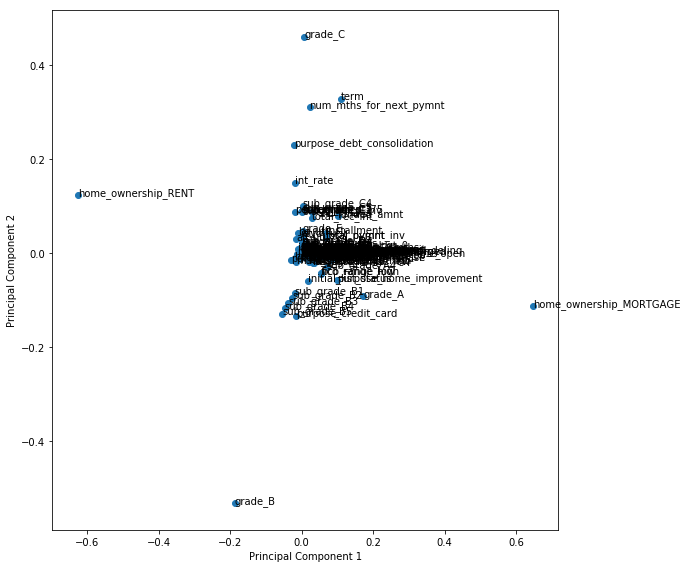

In [203]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [222]:
pca.explained_variance_ratio_

array([9.97437792e-02, 8.98822536e-02, 8.17052789e-02, 7.02274565e-02,
       5.96223579e-02, 4.40575711e-02, 4.10750689e-02, 3.85968808e-02,
       3.43915283e-02, 3.32766049e-02, 2.59794866e-02, 2.42815779e-02,
       2.29371596e-02, 1.93853855e-02, 1.72281851e-02, 1.65935115e-02,
       1.57890286e-02, 1.43358437e-02, 1.27243671e-02, 1.25292324e-02,
       1.21038511e-02, 1.17817743e-02, 1.14463757e-02, 1.13962275e-02,
       1.10753725e-02, 1.09421890e-02, 9.34015052e-03, 8.13594411e-03,
       7.02782665e-03, 6.36536220e-03, 5.92372119e-03, 5.68003387e-03,
       5.42531770e-03, 5.25013823e-03, 4.95320011e-03, 4.88821182e-03,
       4.82637749e-03, 4.64572299e-03, 4.38832081e-03, 4.15801888e-03,
       3.79802185e-03, 3.68649032e-03, 3.52193975e-03, 3.35303865e-03,
       3.26984202e-03, 3.06427426e-03, 2.99260918e-03, 2.65767023e-03,
       2.57774596e-03, 2.35402855e-03, 2.31267357e-03, 2.14057333e-03,
       2.13178876e-03, 2.04722140e-03, 1.85201157e-03, 1.78509990e-03,
      

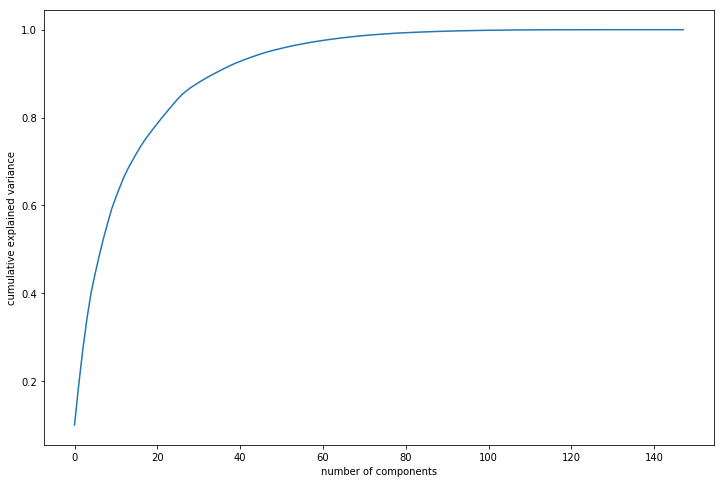

In [223]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [224]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

df_X_pca = pca_final.fit_transform(X)
df_X_pca.shape

(15000, 40)

In [225]:
corrmat = np.corrcoef(df_X_pca.transpose())

In [150]:
#%matplotlib inline
#plt.figure(figsize = (20,10))
#sns.heatmap(corrmat,annot = True)

In [151]:
#df_test_pca = pca_final.transform(X_test)
#df_test_pca.shape

(3750, 40)

<h3>Label propagation with label spreading - Labelling unlabelled data</h3>

Label spreading using KNN - default values. 

In [226]:
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading

In [227]:
X_l = df_X_pca
y_l = y
X_l.shape

(15000, 40)

In [228]:
y_l.shape

(15000,)

In [210]:
labelled_y_l=y_l!=-1
unlabelled_y_l=y_l==-1

In [211]:
labelled_y_l.head

<bound method NDFrame.head of 16458    False
24376    False
7662     False
23826     True
8952      True
19992    False
4358     False
6166      True
20110     True
23103    False
10634    False
3508      True
17564     True
8280      True
23764    False
6984      True
13362     True
8106      True
5476      True
16531    False
8023      True
16449    False
15601     True
16787     True
10541     True
10518     True
7876      True
439       True
18357     True
13749    False
9         True
6767      True
23674    False
1026      True
7522     False
19768     True
13840     True
24796    False
6228      True
2814      True
23617     True
16624    False
22650     True
20739     True
3245      True
3082      True
3322      True
890      False
13558    False
6536     False
18966    False
24640    False
7935      True
15337     True
24479    False
22457    False
6297      True
14085     True
21482    False
11148    False
19530     True
7185     False
3520      True
3792     False
24267     

In [232]:
import gc
gc.collect()

15458

In [229]:
# Learn with LabelSpreading with default values with SVM kernel
label_spread = LabelSpreading(kernel='rbf')

In [233]:
label_spread.fit(X_l, y_l)

LabelSpreading()

In [234]:
y_l.value_counts()

 0    7579
-1    5139
 1    2282
Name: is_default, dtype: int64

In [235]:
label_spread.transduction_.shape

(15000,)

In [236]:
# Traning metrics
y_train_pred_ls = label_spread.predict(X_l)
#y_test_pred_ls = label_spread.predict(df_test_pca)
#print_metrics(y_train, y_test, y_train_pred_rfc, y_test_pred_rfc, train=True)

In [237]:
k=pd.Index(y_train_pred_ls)
k.value_counts()

0    11098
1     3902
dtype: int64

In [238]:

predicted_labels = label_spread.transduction_

true_labels=y_l

cm = confusion_matrix(true_labels, predicted_labels, labels=label_spread.classes_)
print(classification_report(true_labels, predicted_labels))
#print('ROC-AUC score:',roc_auc_score(true_labels, predicted_labels))
print("Confusion matrix")
print(cm)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      5139
           0       0.68      1.00      0.81      7579
           1       0.58      1.00      0.74      2282

    accuracy                           0.66     15000
   macro avg       0.42      0.67      0.52     15000
weighted avg       0.43      0.66      0.52     15000

Confusion matrix
[[7579    0]
 [   0 2282]]


With analysed hyper parameters of alpha and gamma 

In [162]:
# kernel - rbf and tuning hyper parameters
# Learn with LabelSpreading with default values
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'alpha': [0.2,0.4,0.6,0.8]}

# instantiate the model
label_spread = LabelSpreading(kernel='rbf')


# fit tree on training data
l_spread = GridSearchCV(label_spread, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)

In [165]:
l_spread.fit(X_l, y_l)

In [166]:
# scores of GridSearch CV
scores = l_spread.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,22.351827,0.056336,2.504933,0.014717,0.2,{'alpha': 0.2},0.520113,0.516000,0.514824,0.517412,0.513297,0.516329,0.002326,1,0.633626,0.633647,0.633647,0.633647,0.633669,0.633647,0.000014
1,27.065237,0.104271,2.487961,0.016543,0.4,{'alpha': 0.4},0.520819,0.516000,0.513412,0.517647,0.513768,0.516329,0.002723,1,0.633626,0.633647,0.633588,0.633647,0.633610,0.633624,0.000023
2,35.407794,0.160116,2.484187,0.024437,0.6,{'alpha': 0.6},0.520583,0.515529,0.512706,0.517176,0.515651,0.516329,0.002571,1,0.632743,0.632529,0.632471,0.632471,0.632492,0.632541,0.000103
3,36.803042,0.175059,2.474486,0.028378,0.8,{'alpha': 0.8},0.520113,0.511294,0.507059,0.515765,0.514709,0.513788,0.004388,4,0.616448,0.614588,0.615588,0.615294,0.616023,0.615588,0.000635


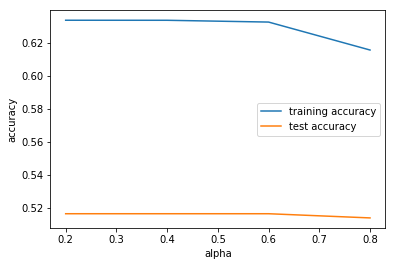

In [167]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_alpha"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_alpha"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [170]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'gamma': range(10,50,10)}

# instantiate the model
label_spread = LabelSpreading(kernel='rbf')


# fit tree on training data
l_spread = GridSearchCV(label_spread, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)

In [171]:
l_spread.fit(X_l, y_l)

GridSearchCV(cv=5, error_score='raise',
       estimator=LabelSpreading(alpha=0.2, gamma=20, kernel='rbf', max_iter=30, n_jobs=1,
        n_neighbors=7, tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': range(10, 50, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [172]:
# scores of GridSearch CV
scores = l_spread.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,22.211893,0.099334,2.489878,0.022134,10,{'gamma': 10},0.525053,0.516000,0.514588,0.516706,0.517298,0.517929,0.003675,1,0.633273,0.633294,0.633235,0.633176,0.633316,0.633259,0.000049
1,22.264443,0.053226,2.509948,0.030219,20,{'gamma': 20},0.520113,0.516000,0.514824,0.517412,0.513297,0.516329,0.002326,2,0.633626,0.633647,0.633647,0.633647,0.633669,0.633647,0.000014
2,22.261009,0.080949,2.503361,0.022770,30,{'gamma': 30},0.517996,0.516000,0.513882,0.515529,0.511179,0.514918,0.002283,3,0.633626,0.633647,0.633647,0.633647,0.633669,0.633647,0.000014
3,22.422629,0.299298,2.502824,0.033010,40,{'gamma': 40},0.516820,0.514824,0.512941,0.516000,0.510473,0.514212,0.002279,4,0.633626,0.633647,0.633647,0.633647,0.633669,0.633647,0.000014


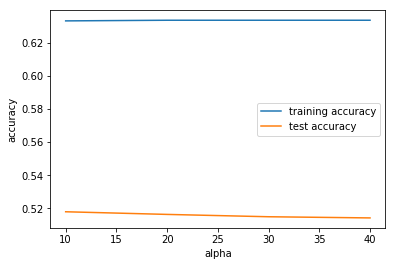

In [173]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_gamma"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_gamma"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [173]:
# Learn with LabelSpreading with default values with SVM kernel
label_spread = LabelSpreading(kernel='rbf',alpha=0.2,gamma=10)

In [174]:
label_spread.fit(X_l, y_l)

LabelSpreading(gamma=10)

In [247]:
# Traning metrics
y_train_pred_ls = label_spread.predict(X_l)



In [248]:
cm = confusion_matrix(y_l, y_train_pred_ls, labels=[0,1])
print(classification_report(y_l, y_train_pred_ls))

print("Confusion matrix")
print(cm)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      5139
           0       0.68      1.00      0.81      7579
           1       0.58      1.00      0.74      2282

    accuracy                           0.66     15000
   macro avg       0.42      0.67      0.52     15000
weighted avg       0.43      0.66      0.52     15000

Confusion matrix
[[7579    0]
 [   0 2282]]


In [249]:
y_spread_predicted_labels = label_spread.transduction_

cm = confusion_matrix(y_l, y_spread_predicted_labels, labels=[0,1])
print(classification_report(y_l, y_spread_predicted_labels))

print("Confusion matrix")
print(cm)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      5139
           0       0.68      1.00      0.81      7579
           1       0.58      1.00      0.74      2282

    accuracy                           0.66     15000
   macro avg       0.42      0.67      0.52     15000
weighted avg       0.43      0.66      0.52     15000

Confusion matrix
[[7579    0]
 [   0 2282]]


In [250]:
y_spread_predicted_labels.shape

(15000,)

<h3>Using Label propagation method</h3>

In [240]:
label_prop = LabelPropagation(kernel='rbf')

In [241]:
label_prop.fit(X_l, y_l)

LabelPropagation()

In [242]:
y_prop_predicted_labels = label_prop.transduction_

y_prop_true_labels=y_l

cm = confusion_matrix(y_prop_true_labels, y_prop_predicted_labels, labels=[0,1])
print(classification_report(y_prop_true_labels, y_prop_predicted_labels))
#print(roc_auc_score(y_prop_true_labels, y_prop_predicted_labels))
print("Confusion matrix")
print(cm)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      5139
           0       0.67      1.00      0.80      7579
           1       0.62      1.00      0.77      2282

    accuracy                           0.66     15000
   macro avg       0.43      0.67      0.52     15000
weighted avg       0.43      0.66      0.52     15000

Confusion matrix
[[7579    0]
 [   0 2282]]


<h3>Train test split after label propagation: label spreading

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X,y_spread_predicted_labels,test_size=0.15,random_state=101)

<h3>Label spreading using 'RBF' - Building Logistic Regression</h3>

In [252]:
def print_metrics(y_train, y_test, y_train_pred, y_test_pred, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, y_train_pred)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, y_train_pred,labels=(0,1))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, y_train_pred,labels=(0,1))))
        #res = cross_val_score(samp_model, X_train, y_train, cv=10, scoring='accuracy')
        #print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        #print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))        
    elif train==False:
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, y_test_pred)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, y_test_pred,labels=(0,1))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, y_test_pred,labels=(0,1))))
        #print('ROC-AUC score:',roc_auc_score(y_test, y_test_pred,labels=(0,1)))

In [253]:
lr = LogisticRegression()
model_lr_spread = lr.fit(X_train,y_train)

In [256]:
# Traning metrics
y_train_lr_pred = model_lr_spread.predict(X_train)
y_test_lr_pred = model_lr_spread.predict(X_test)
print_metrics(y_train, y_test, y_train_lr_pred, y_test_lr_pred,train=True)

Train Result:

accuracy score: 0.8994

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      9404
           1       0.87      0.73      0.79      3346

    accuracy                           0.90     12750
   macro avg       0.89      0.84      0.86     12750
weighted avg       0.90      0.90      0.90     12750


Confusion Matrix: 
 [[9037  367]
 [ 916 2430]]



In [258]:
print_metrics(y_train, y_test, y_train_lr_pred, y_test_lr_pred,train=False)

Test Result:

accuracy score: 0.8960

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1694
           1       0.86      0.69      0.77       556

    accuracy                           0.90      2250
   macro avg       0.88      0.83      0.85      2250
weighted avg       0.89      0.90      0.89      2250


Confusion Matrix: 
 [[1634   60]
 [ 174  382]]

ROC-AUC score: 0.8258156166920065


In [259]:
print('ROC-AUC score:',metrics.roc_auc_score(y_test, y_test_lr_pred))

ROC-AUC score: 0.8258156166920065


In [260]:
from sklearn import svm
from sklearn import metrics

# an initial SVM model with linear kernel   
svm_linear = svm.SVC(kernel='linear')

In [261]:
# fit
svm_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [262]:
# Traning metrics
y_train_sv_s_pred = svm_linear.predict(X_train)
y_test_sv_s_pred = svm_linear.predict(X_test)
print_metrics(y_train, y_test, y_train_sv_s_pred, y_test_sv_s_pred,train=True)

Train Result:

accuracy score: 0.9031

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      9404
           1       0.89      0.72      0.80      3346

    accuracy                           0.90     12750
   macro avg       0.90      0.84      0.87     12750
weighted avg       0.90      0.90      0.90     12750


Confusion Matrix: 
 [[9105  299]
 [ 936 2410]]



In [264]:
print_metrics(y_train, y_test, y_train_sv_s_pred, y_test_sv_s_pred,train=False)

Test Result:

accuracy score: 0.9058

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1694
           1       0.88      0.71      0.79       556

    accuracy                           0.91      2250
   macro avg       0.90      0.84      0.86      2250
weighted avg       0.90      0.91      0.90      2250


Confusion Matrix: 
 [[1641   53]
 [ 159  397]]

ROC-AUC score: 0.8413709410275794


In [265]:
from sklearn import svm
from sklearn import metrics

# an initial SVM model with linear kernel   
svm_rbf = svm.SVC(kernel='rbf',class_weight='balanced')

In [266]:
# fit
svm_rbf.fit(X_train,y_train)

SVC(class_weight='balanced')

In [267]:
# Traning metrics
y_train_rbf_s_pred = svm_rbf.predict(X_train)
y_test_rbf_s_pred = svm_rbf.predict(X_test)
print_metrics(y_train, y_test, y_train_rbf_s_pred, y_test_rbf_s_pred,train=True)

Train Result:

accuracy score: 0.9124

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      9404
           1       0.78      0.93      0.85      3346

    accuracy                           0.91     12750
   macro avg       0.88      0.92      0.89     12750
weighted avg       0.92      0.91      0.91     12750


Confusion Matrix: 
 [[8534  870]
 [ 247 3099]]



In [268]:
print_metrics(y_train, y_test, y_train_rbf_s_pred, y_test_rbf_s_pred,train=False)

Test Result:

accuracy score: 0.9040

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      1694
           1       0.76      0.89      0.82       556

    accuracy                           0.90      2250
   macro avg       0.86      0.90      0.88      2250
weighted avg       0.91      0.90      0.91      2250


Confusion Matrix: 
 [[1541  153]
 [  63  493]]

ROC-AUC score: 0.8981859376725303


<h3> Label Propagation using SVM kernel - Building models </h3>

In [269]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X,y_prop_predicted_labels,test_size=0.15,random_state=101)

In [271]:
lr = LogisticRegression()
model_lr_prop = lr.fit(X_train_p,y_train_p)

In [272]:
# Traning metrics
y_train_lp_pred = model_lr_prop.predict(X_train_p)
y_test_lp_pred = model_lr_prop.predict(X_test_p)
print_metrics(y_train_p, y_test_p, y_train_lp_pred, y_test_lp_pred,train=True)

Train Result:

accuracy score: 0.9138

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      9606
           1       0.89      0.75      0.81      3144

    accuracy                           0.91     12750
   macro avg       0.90      0.86      0.88     12750
weighted avg       0.91      0.91      0.91     12750


Confusion Matrix: 
 [[9306  300]
 [ 799 2345]]



In [273]:
print_metrics(y_train_p, y_test_p, y_train_lp_pred, y_test_lp_pred,train=False)

Test Result:

accuracy score: 0.9209

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1739
           1       0.92      0.71      0.80       511

    accuracy                           0.92      2250
   macro avg       0.92      0.85      0.88      2250
weighted avg       0.92      0.92      0.92      2250


Confusion Matrix: 
 [[1707   32]
 [ 146  365]]

ROC-AUC score: 0.8479421670911034


<h3> SVM Model </h3>

In [274]:
from sklearn import svm
from sklearn import metrics

# an initial SVM model with linear kernel   
svm_rbf_p = svm.SVC(kernel='rbf',class_weight='balanced')

In [275]:
# fit
svm_rbf_p.fit(X_train_p,y_train_p)

SVC(class_weight='balanced')

In [276]:
# Traning metrics
y_train_sp_pred = svm_rbf_p.predict(X_train_p)
y_test_sp_pred = svm_rbf_p.predict(X_test_p)
print_metrics(y_train_p, y_test_p, y_train_sp_pred, y_test_sp_pred,train=True)

Train Result:

accuracy score: 0.9281

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      9606
           1       0.81      0.93      0.86      3144

    accuracy                           0.93     12750
   macro avg       0.89      0.93      0.91     12750
weighted avg       0.93      0.93      0.93     12750


Confusion Matrix: 
 [[8919  687]
 [ 230 2914]]



In [277]:
print_metrics(y_train_p, y_test_p, y_train_sp_pred, y_test_sp_pred,train=False)

Test Result:

accuracy score: 0.9262

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      1739
           1       0.80      0.90      0.85       511

    accuracy                           0.93      2250
   macro avg       0.88      0.92      0.90      2250
weighted avg       0.93      0.93      0.93      2250


Confusion Matrix: 
 [[1623  116]
 [  50  461]]

ROC-AUC score: 0.9177238195017269


<h3> Handling Class imbalancing - Oversampling </h3>

In [252]:
#!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [246]:
#!pip install --upgrade pip

    100% |████████████████████████████████| 1.5MB 7.8MB/s eta 0:00:01
  Found existing installation: pip 18.0
    Uninstalling pip-18.0:
      Successfully uninstalled pip-18.0


In [278]:
# Oversampling with SMOTE - handling class imbalancing
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_os, y_train_os = sm.fit_resample(X_train, y_train)

<h3> Building Model - Logistic Regression </h3>

In [279]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()
lr_model = lr.fit(X_train_os, y_train_os)

In [280]:
def print_metrics(y_train, y_test, y_train_pred, y_test_pred, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, y_train_pred)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, y_train_pred)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, y_train_pred)))
        #res = cross_val_score(samp_model, X_train, y_train, cv=10, scoring='accuracy')
        #print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        #print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))        
    elif train==False:
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, y_test_pred)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, y_test_pred)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, y_test_pred)))
        #print('ROC-AUC score:',roc_auc_score(y_test, y_test_pred))

In [281]:
# Traning metrics
y_train_lr_os_pred = lr_model.predict(X_train_os)
y_test_lr_os_pred = lr_model.predict(X_test)
print_metrics(y_train_os, y_test,y_train_lr_os_pred,y_test_lr_os_pred,train=True)

Train Result:

accuracy score: 0.8919

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      9404
           1       0.89      0.89      0.89      9404

    accuracy                           0.89     18808
   macro avg       0.89      0.89      0.89     18808
weighted avg       0.89      0.89      0.89     18808


Confusion Matrix: 
 [[8388 1016]
 [1018 8386]]



In [282]:
print_metrics(y_train_os, y_test,y_train_lr_os_pred,y_test_lr_os_pred,train=False)

Test Result:

accuracy score: 0.8911

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.90      0.93      1694
           1       0.74      0.85      0.79       556

    accuracy                           0.89      2250
   macro avg       0.85      0.88      0.86      2250
weighted avg       0.90      0.89      0.89      2250


Confusion Matrix: 
 [[1532  162]
 [  83  473]]



<h3> Model - Random forests classifier - with default hyper parameters </h3>

In [283]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [284]:
# fit
rfc.fit(X_train_os, y_train_os)

RandomForestClassifier()

In [285]:
# Traning metrics
y_train_rfc_s_pred = rfc.predict(X_train_os)
y_test_rfc_s_pred = rfc.predict(X_test)
print_metrics(y_train_os, y_test,y_train_rfc_s_pred,y_test_rfc_s_pred,train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9404
           1       1.00      1.00      1.00      9404

    accuracy                           1.00     18808
   macro avg       1.00      1.00      1.00     18808
weighted avg       1.00      1.00      1.00     18808


Confusion Matrix: 
 [[9404    0]
 [   0 9404]]



In [286]:
print_metrics(y_train_os, y_test,y_train_rfc_s_pred,y_test_rfc_s_pred, train=False)

Test Result:

accuracy score: 0.8942

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      1694
           1       0.80      0.76      0.78       556

    accuracy                           0.89      2250
   macro avg       0.86      0.85      0.86      2250
weighted avg       0.89      0.89      0.89      2250


Confusion Matrix: 
 [[1590  104]
 [ 134  422]]



Model generation Using Label Propagation - With CI

In [287]:
# Oversampling with SMOTE - handling class imbalancing
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_os_p, y_train_os_p = sm.fit_resample(X_train_p, y_train_p)

In [288]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()
lr_model = lr.fit(X_train_os_p, y_train_os_p)

In [289]:
# Traning metrics
y_train_lr_os_pred = lr_model.predict(X_train_os_p)
y_test_lr_os_pred = lr_model.predict(X_test)
print_metrics(y_train_os_p, y_test,y_train_lr_os_pred,y_test_lr_os_pred,train=True)

Train Result:

accuracy score: 0.9046

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      9606
           1       0.91      0.90      0.90      9606

    accuracy                           0.90     19212
   macro avg       0.90      0.90      0.90     19212
weighted avg       0.90      0.90      0.90     19212


Confusion Matrix: 
 [[8717  889]
 [ 943 8663]]



In [290]:
print_metrics(y_train_os_p, y_test,y_train_lr_os_pred,y_test_lr_os_pred,train=False)

Test Result:

accuracy score: 0.8933

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      1694
           1       0.77      0.81      0.79       556

    accuracy                           0.89      2250
   macro avg       0.85      0.87      0.86      2250
weighted avg       0.90      0.89      0.89      2250


Confusion Matrix: 
 [[1557  137]
 [ 103  453]]



Steps further - 
1. To include various class imbalancing techniques and try identify various results
2. To include rejected loan applications and perform reject inference 


<h3> Model - Support vector machines </h3>

In [291]:
from sklearn import svm
from sklearn import metrics

# an initial SVM model with linear kernel   
svm_linear = svm.SVC(kernel='linear')

# fit
svm_linear.fit(X_train_os_p, y_train_os_p)

SVC(kernel='linear')

In [292]:
# Traning metrics
y_train_svc_os_pred = svm_linear.predict(X_train_os_p)
y_test_svc_os_pred = svm_linear.predict(X_test)
print_metrics(y_train_os_p, y_test,y_train_svc_os_pred,y_test_svc_os_pred,train=True)


Train Result:

accuracy score: 0.9113

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      9606
           1       0.91      0.91      0.91      9606

    accuracy                           0.91     19212
   macro avg       0.91      0.91      0.91     19212
weighted avg       0.91      0.91      0.91     19212


Confusion Matrix: 
 [[8726  880]
 [ 824 8782]]



In [293]:
print_metrics(y_train_os_p, y_test,y_train_svc_os_pred,y_test_svc_os_pred,train=False)

Test Result:

accuracy score: 0.8960

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      1694
           1       0.77      0.82      0.80       556

    accuracy                           0.90      2250
   macro avg       0.86      0.87      0.86      2250
weighted avg       0.90      0.90      0.90      2250


Confusion Matrix: 
 [[1562  132]
 [ 102  454]]



In [294]:
# run gc.collect() (garbage collect) to free up memory
# else, since the dataset is large and SVM is computationally heavy,
# it'll throw a memory error while training
import gc
gc.collect()

329

In [296]:
# Non-linear SVM
# rbf kernel with other hyperparameters kept to default 
svm_rbf = svm.SVC(kernel='rbf', class_weight='balanced')
svm_rbf.fit(X_train_os_p, y_train_os_p)

SVC(class_weight='balanced')

In [297]:

# Traning metrics
y_train_rbf_os_pred = svm_rbf.predict(X_train_os_p)
y_test_rbf_os_pred = svm_rbf.predict(X_test)
print_metrics(y_train_os_p, y_test,y_train_svc_os_pred,y_test_svc_os_pred,train=True)


Train Result:

accuracy score: 0.9113

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      9606
           1       0.91      0.91      0.91      9606

    accuracy                           0.91     19212
   macro avg       0.91      0.91      0.91     19212
weighted avg       0.91      0.91      0.91     19212


Confusion Matrix: 
 [[8726  880]
 [ 824 8782]]



In [298]:
# Testing metrics
print_metrics(y_train_os_p, y_test,y_train_svc_os_pred,y_test_svc_os_pred,train=False)

Test Result:

accuracy score: 0.8960

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      1694
           1       0.77      0.82      0.80       556

    accuracy                           0.90      2250
   macro avg       0.86      0.87      0.86      2250
weighted avg       0.90      0.90      0.90      2250


Confusion Matrix: 
 [[1562  132]
 [ 102  454]]



<h3> Below To be ignored </h3>

To add K fold method cross validation of sampling multiple samples of 10000

In [ ]:
# conduct (grid search) cross-validation to find the optimal values 
# of cost C and the choice of kernel

from sklearn.model_selection import GridSearchCV

parameters = {'C':[1, 10, 100], 
             'gamma': [1e-2, 1e-3, 1e-4]}

# instantiate a model 
svc_grid_search = svm.SVC(kernel="rbf")

# create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy')

# fit
clf.fit(x_train, y_train)

In [ ]:
# results
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

In [ ]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

plt.show()

In [ ]:
# Final Model
# optimal hyperparameters
best_C = 1
best_gamma = 0.001

# model
svm_final = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma)

# fit
svm_final.fit(x_train, y_train)

In [ ]:
# predict
predictions = svm_final.predict(x_test)

In [ ]:
# Testing metrics
print_metrics(svm_linear, df_train_pca_r, y_train_r, df_test_pca, y_test, train=False)